<a href="https://colab.research.google.com/github/AllainaaS/ADS/blob/main/EX10_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


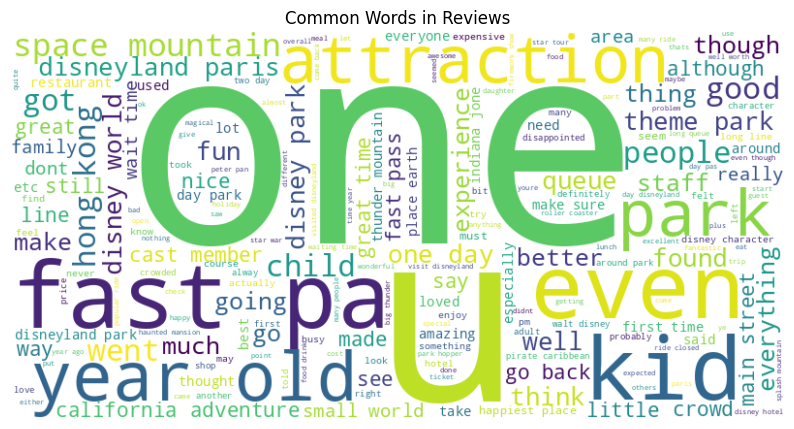

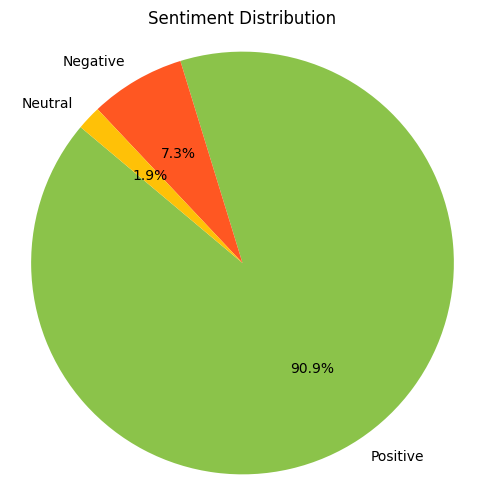

<ipython-input-4-456869f3b436>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


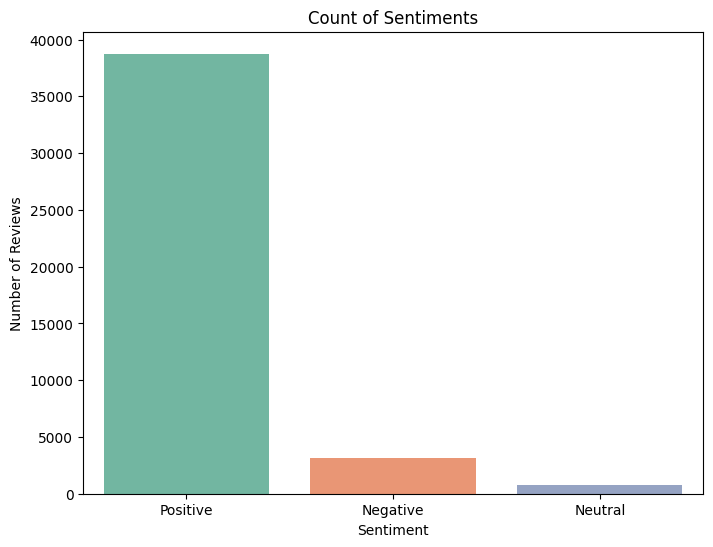

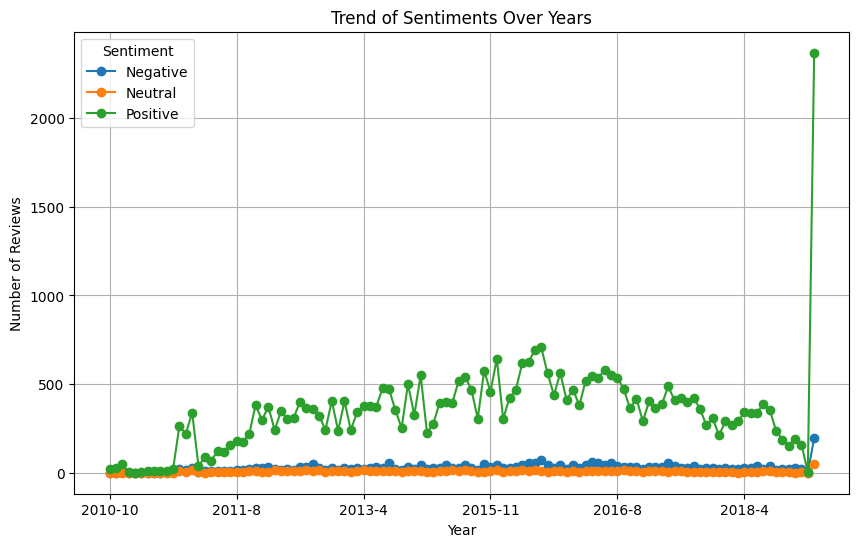

In [4]:
!pip install nltk textblob wordcloud vaderSentiment matplotlib seaborn

import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource


df = pd.read_csv('DisneylandReviews.csv', encoding='ISO-8859-1')
df = df[['Review_Text', 'Year_Month', 'Reviewer_Location']].dropna()
df.reset_index(drop=True, inplace=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords + Lemma
    return " ".join(tokens)

df['Cleaned_Text'] = df['Review_Text'].apply(preprocess_text)

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

all_words = ' '.join(df['Cleaned_Text'])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Reviews')
plt.show()

sent_counts = df['Sentiment'].value_counts()
colors = ['#8BC34A', '#FF5722', '#FFC107']
plt.figure(figsize=(6,6))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

trend_df = df.groupby(['Year_Month', 'Sentiment']).size().unstack().fillna(0)
trend_df.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Trend of Sentiments Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()
